In [60]:
# EDA

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('./data/train.csv')

df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [61]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [62]:
df.Response.value_counts()

0    10089739
1     1415059
Name: Response, dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [64]:
df.nunique()

id                      11504798
Gender                         2
Age                           66
Driving_License                2
Region_Code                   54
Previously_Insured             2
Vehicle_Age                    3
Vehicle_Damage                 2
Annual_Premium             51728
Policy_Sales_Channel         152
Vintage                      290
Response                       2
dtype: int64

In [65]:
df['Vehicle_Age'].value_counts()

1-2 Year     5982678
< 1 Year     5044145
> 2 Years     477975
Name: Vehicle_Age, dtype: int64

In [66]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Text(0.5, 1.0, 'Response')

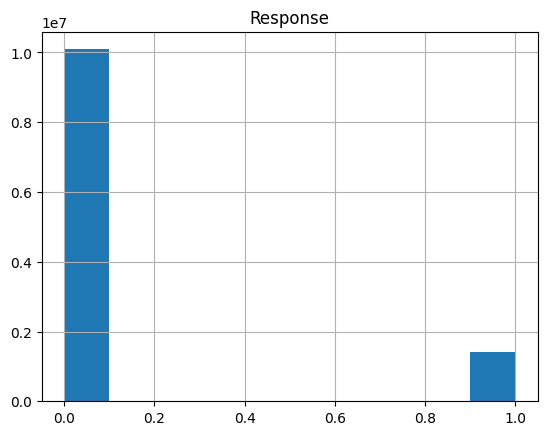

In [67]:
df.iloc[:,-1].hist()
plt.title(df.columns[-1])

In [68]:
def is_unique(data,col,n):
    X = data[col].unique()
    if len(X) == n:
        print(col)

for col in df.columns:
    is_unique(df,col,2)

Gender
Driving_License
Previously_Insured
Vehicle_Damage
Response


<Axes: >

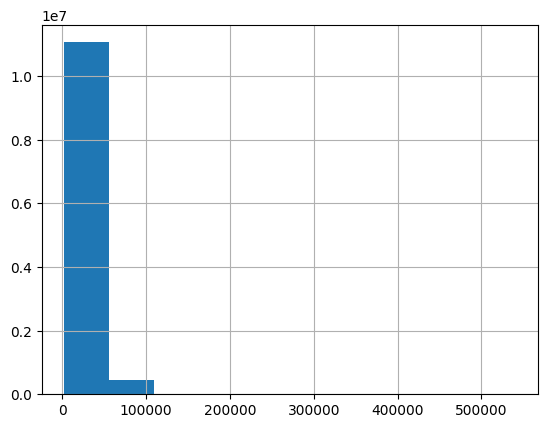

In [69]:
# Reduce train size (10M too many datapoints)

df['Annual_Premium'].hist()

In [70]:
# Print mean and variance
num_cols = df.select_dtypes(include=['int64','float64'])

for col in num_cols:
    means = df[col].mean()
    variances = df[col].std()

    print(f"Column {col}:")
    print(f"  Mean: {means}")
    print(f"  Variance: {variances}")

Column id:
  Mean: 5752398.5
  Variance: 3321149.2554738037
Column Age:
  Mean: 38.38356336199905
  Variance: 14.993458508587118
Column Driving_License:
  Mean: 0.9980219557092614
  Variance: 0.044431203038093135
Column Region_Code:
  Mean: 26.41868976752134
  Variance: 12.991590202826913
Column Previously_Insured:
  Mean: 0.46299656890977137
  Variance: 0.4986288877379072
Column Annual_Premium:
  Mean: 30461.370410588694
  Variance: 16454.74520524573
Column Policy_Sales_Channel:
  Mean: 112.42544188954903
  Variance: 54.035707775430815
Column Vintage:
  Mean: 163.89774388042275
  Variance: 79.97953110372767
Column Response:
  Mean: 0.12299729208631043
  Variance: 0.3284341145214116


In [71]:
df['Response'].value_counts()

0    10089739
1     1415059
Name: Response, dtype: int64

In [72]:
min_class = df['Response'].value_counts()[1]
min_class

1415059

In [73]:
# Number of random data points you want to select
n = min_class

# Select n random data points from majority class
maj_df = df[df['Response']==0].sample(n=n, random_state=7)  # random_state is used for reproducibility

maj_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
6926847,6926847,Male,21,1,8.0,1,< 1 Year,No,43872.0,160.0,106,0
2606866,2606866,Male,50,1,28.0,0,1-2 Year,Yes,40378.0,26.0,281,0
9356482,9356482,Female,24,1,29.0,1,< 1 Year,No,43801.0,152.0,165,0
11367445,11367445,Male,71,1,28.0,1,1-2 Year,No,2630.0,26.0,197,0
6003615,6003615,Male,36,1,45.0,0,1-2 Year,Yes,24647.0,124.0,126,0


<Axes: >

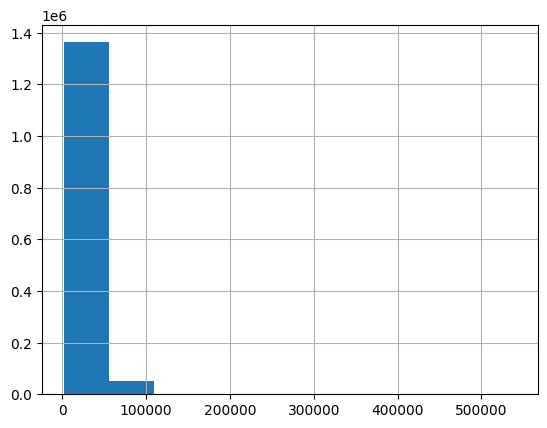

In [74]:
maj_df['Annual_Premium'].hist()

In [75]:
maj_df['Response'].value_counts()

0    1415059
Name: Response, dtype: int64

In [77]:
# Save the new DataFrame to a CSV file
min_df = df[df['Response']==1]

sum_df = pd.concat([maj_df,min_df],axis=0)
sum_df.to_csv('./data/sub_train.csv', index=False)